#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/data.csv')
data.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [ ]:
data.shape

(4009, 4)

#EDA

In [ ]:
data['Label'].value_counts()

0    2137
1    1872
Name: Label, dtype: int64

In [ ]:
print(round(1872/4009*100,2),"% is Real News")

46.69 % is Real News


In [ ]:
data['URLs'].value_counts()

http://beforeitsnews.com/u-s-politics/2017/10/madagascar-plague-kills-20-amid-unusually-rapid-rise-in-cases-2537247.html\r\n                  5
http://beforeitsnews.com/sports/2017/10/2017-fantasy-football-kicker-rankings-week-5-2701896.html\r\n                                         5
http://beforeitsnews.com/u-s-politics/2017/10/snl-michael-che-calls-trump-you-btch-over-puerto-rico-response-2537087.html\r\n                 5
http://beforeitsnews.com/u-s-politics/2017/10/ryan-gosling-guy-on-a-boat-give-dating-advice-on-snl-2537090.html\r\n                           5
http://beforeitsnews.com/u-s-politics/2017/10/will-security-measures-change-in-response-to-mass-shootings-2537191.html\r\n                    5
                                                                                                                                             ..
https://www.reuters.com/article/us-mexico-slim/mexican-mogul-slim-donates-105-million-to-earthquake-recovery-efforts-idUSKBN1CF36C\r\n  

In [ ]:
data = pd.DataFrame(data)

##Counting Sources of News (NewsChannels, Website, etc)

In [ ]:
import re
from collections import Counter

pattern = r'https?://(?:www\.)?([^/]+)\.(?:com|html|tv|co|it)'
matches = []
for url in data['URLs']:
    extracted_text = re.findall(pattern, url)
    matches.extend(extracted_text)

matches_counter = Counter(matches)
matches_counter

Counter({'bbc': 343,
         'reuters': 647,
         'nytimes': 345,
         'cnn': 391,
         'beforeitsnews': 1694,
         'activistpost': 271,
         'dailybuzzlive': 99,
         'disclose': 71,
         'abcnews.go': 57,
         'money.cnn': 49,
         'edition.cnn': 16,
         'inhealth.cnn': 14,
         'bleacherreport': 8,
         'clarivate': 3,
         'api': 2,
         'thelab.bleacherreport': 1})

In [ ]:
len(matches_counter)

16

In [ ]:
data['URLs'].isnull().value_counts()

False    4009
Name: URLs, dtype: int64

In [ ]:
data['Source'] = data['URLs'].apply(lambda x: re.findall(pattern, x)[0] if re.findall(pattern, x) else None)
data

,URLs,Headline,Body,Label,Source
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1,bbc
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1,reuters
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1,nytimes
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1,reuters
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1,cnn
...,...,...,...,...,...
4004,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch,Trends to Watch\n% of readers think this story...,0,beforeitsnews
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0,beforeitsnews
4006,https://www.activistpost.com/2017/09/ron-paul-...,"Ron Paul on Trump, Anarchism & the AltRight",NaN,0,activistpost
4007,https://www.reuters.com/article/us-china-pharm...,China to accept overseas trial data in bid to ...,SHANGHAI (Reuters) - China said it plans to ac...,1,reuters


##Cross Checking Null Values in 'Source' Column

In [ ]:
data['Source'].isnull().value_counts

<bound method IndexOpsMixin.value_counts of 0       False
1       False
2       False
3       False
4       False
        ...  
4004    False
4005    False
4006    False
4007    False
4008    False
Name: Source, Length: 4009, dtype: bool>

In [ ]:
#Used to find different pattern (.com/.html/.co/.tv/.it/...)

null_rows = data[data['Source'].isnull()]
null_rows

,URLs,Headline,Body,Label,Source


## Fake News Dataframe & it's EDA

In [ ]:
fake_news = data[data['Label']==0]
fake_news

,URLs,Headline,Body,Label,Source
5,http://beforeitsnews.com/sports/2017/09/jetnat...,JetNation FanDuel League; Week 4,JetNation FanDuel League; Week 4\n% of readers...,0,beforeitsnews
10,https://www.activistpost.com/2017/09/u-s-presi...,U.S. President Donald Trump Quietly Signs Law ...,By Aaron Kesel\nAs former White House chief of...,0,activistpost
11,http://beforeitsnews.com/sports/2017/10/2017-f...,2017 Fantasy Football Team Defense Rankings - ...,2017 Fantasy Football Team Defense Rankings – ...,0,beforeitsnews
12,http://beforeitsnews.com/sports/2017/09/just-s...,Just Shut Up & Play Some Damn Baseball!!,Just Shut Up & Play Some Damn Baseball!!\n(Bef...,0,beforeitsnews
14,http://beforeitsnews.com/sports/2017/10/107-ch...,"10/7: Chuck Axed; HBD Brickyard, Adam, Moonlig...",A Potato Battery Can Light up a Room for Over ...,0,beforeitsnews
...,...,...,...,...,...
4003,http://beforeitsnews.com/u-s-politics/2017/10/...,CNN and Globalist Exposed - Steve Quayle and A...,"Vietnam Is in Great Danger, You Must Publish a...",0,beforeitsnews
4004,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch,Trends to Watch\n% of readers think this story...,0,beforeitsnews
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0,beforeitsnews
4006,https://www.activistpost.com/2017/09/ron-paul-...,"Ron Paul on Trump, Anarchism & the AltRight",NaN,0,activistpost


In [ ]:
fake_news['Source'].value_counts()

beforeitsnews    1694
activistpost      271
dailybuzzlive      99
disclose           71
api                 2
Name: Source, dtype: int64

    These are the fake news sources identified in dataset

## Real News Dataframe & it's EDA

In [ ]:
real_news = data[data['Label']==1]
real_news

,URLs,Headline,Body,Label,Source
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1,bbc
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1,reuters
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1,nytimes
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1,reuters
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1,cnn
...,...,...,...,...,...
3995,http://www.bbc.com/news/entertainment-arts-415...,Harvey Weinstein scandal: What next for Hollyw...,Image copyright Getty Images Image caption Har...,1,bbc
3999,https://www.reuters.com/article/us-baseball-ml...,Red Sox fire manager Farrell after five seasons,"FILE PHOTO: Oct 25, 2013; St. Louis, MO, USA; ...",1,reuters
4001,https://www.nytimes.com/2017/10/09/obituaries/...,"Hervé Leroux, Creator of the Hervé Léger Banda...","Mr. Leroux was born Hervé Peugnet on May 30, 1...",1,nytimes
4002,http://www.cnn.com/videos/politics/2017/10/09/...,The price tag for Pence's trip to Indianapolis,Ethical questions loom after Vice President Mi...,1,cnn


In [ ]:
real_news['Source'].value_counts()

reuters                  647
cnn                      390
nytimes                  344
bbc                      343
abcnews.go                57
money.cnn                 49
edition.cnn               16
inhealth.cnn              14
bleacherreport             8
clarivate                  3
thelab.bleacherreport      1
Name: Source, dtype: int64

    These above mentioned News Source are Genuine & quite known worldwide, hence can be considered authentic.

## WordCloud with the Original Dataset, ***Hot Topics!!***

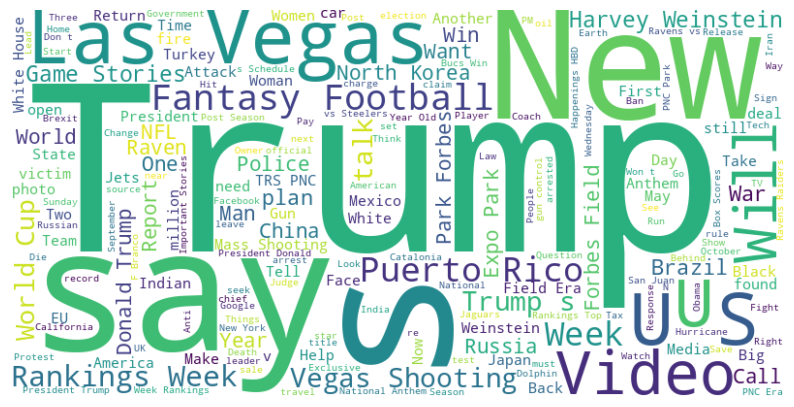

In [ ]:
from wordcloud import WordCloud, STOPWORDS
all_headlines = ' '.join(data['Headline'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_headlines)

# Plot the WordCloud image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## WordCloud with the only Fake News Dataset, ***Fake Hot Topics!!***

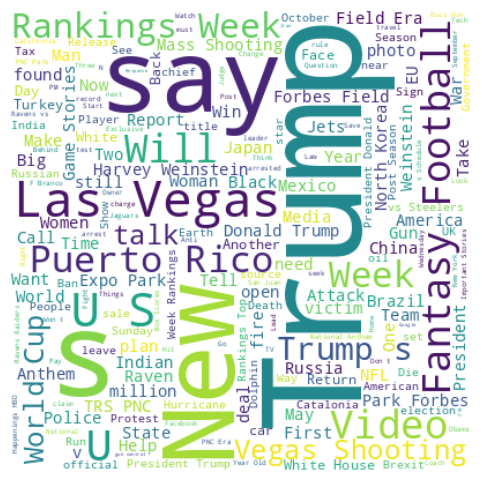

In [ ]:
fake_headlines = ' '.join(fake_news['Headline'])

fake_news_wordcloud = WordCloud(width=400, height=400, background_color='white').generate(all_headlines)

# Plot the WordCloud image
plt.figure(figsize=(10, 6))
plt.imshow(fake_news_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## WordCloud with the only Real News Dataset, ***Real Hot Topics!!***

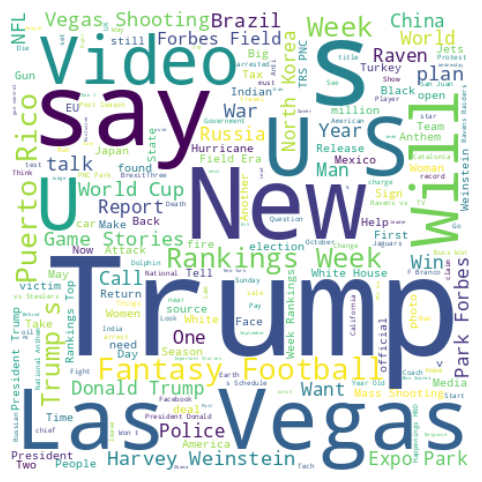

In [ ]:
real_headlines = ' '.join(fake_news['Headline'])

real_news_wordcloud = WordCloud(width=400, height=400, background_color='white').generate(all_headlines)

# Plot the WordCloud image
plt.figure(figsize=(10, 6))
plt.imshow(real_news_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
value_counts = data['Label'].value_counts()

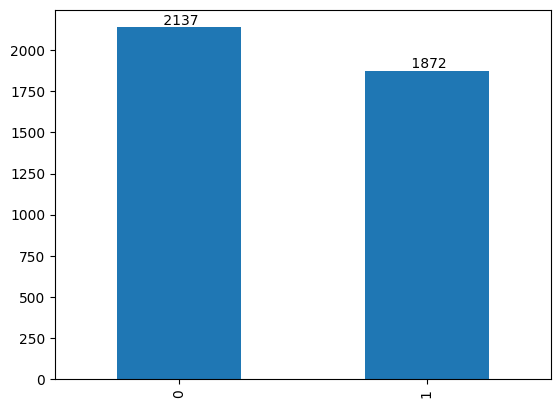

In [ ]:
ay = data['Label'].value_counts().plot(kind = "bar")
for i, count in enumerate(value_counts):
    ay.text(i, count, f' {count}', ha='center', va='bottom', fontsize=10, color='black')

# Model Training & Testing

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
data.head()

,URLs,Headline,Body,Label,Source
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1,bbc
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1,reuters
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1,nytimes
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1,reuters
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1,cnn


## Feature Selection for Training

In [ ]:
X_head = data.iloc[: , 1]
X_body = data.iloc[: , 2]

In [ ]:
X_head

0              Four ways Bob Corker skewered Donald Trump
1       Linklater's war veteran comedy speaks to moder...
2       Trump’s Fight With Corker Jeopardizes His Legi...
3       Egypt's Cheiron wins tie-up with Pemex for Mex...
4             Jason Aldean opens 'SNL' with Vegas tribute
                              ...                        
4004                                      Trends to Watch
4005    Trump Jr. Is Soon To Give A 30-Minute Speech F...
4006          Ron Paul on Trump, Anarchism & the AltRight
4007    China to accept overseas trial data in bid to ...
4008    Vice President Mike Pence Leaves NFL Game Beca...
Name: Headline, Length: 4009, dtype: object

In [ ]:
X_body

0       Image copyright Getty Images\nOn Sunday mornin...
1       LONDON (Reuters) - “Last Flag Flying”, a comed...
2       The feud broke into public view last week when...
3       MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...
4       Country singer Jason Aldean, who was performin...
                              ...                        
4004    Trends to Watch\n% of readers think this story...
4005    Trump Jr. Is Soon To Give A 30-Minute Speech F...
4006                                                  NaN
4007    SHANGHAI (Reuters) - China said it plans to ac...
4008    Vice President Mike Pence Leaves NFL Game Beca...
Name: Body, Length: 4009, dtype: object

In [ ]:
y = data.iloc[: , -2]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int64

In [ ]:
X_head.iloc[24]

'9/29 Through the 40s: HBD Cannonball & Paul, Camnitz Clan, Game Stories'

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
corpus_head = []
ps = PorterStemmer()
for i in range(len(X_head)):
    r = re.sub('[^a-zA-Z]',' ',X_head[i])
    r = r.lower()
    r = r.split()
    r = " ".join(ps.stem(word) for word in r if word not in stopwords.words('english'))
    corpus_head.append(r)

In [ ]:
corpus_head[96]

'look thursday night footbal game'

In [ ]:
tf = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
heading = tf.fit_transform(corpus_head)

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(heading , y ,test_size = 0.2 )
mn = ExtraTreesClassifier()
mn.fit(X_train,y_train)
y_pred = mn.predict(X_test)

In [ ]:
print(classification_report(y_pred , y_test))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       419
           1       0.84      0.88      0.86       383

    accuracy                           0.86       802
   macro avg       0.86      0.86      0.86       802
weighted avg       0.86      0.86      0.86       802



## Body Selection for Training

In [ ]:
corpus_body = []
ps = PorterStemmer()
for i in range(len(X_body)):
    r = re.sub('[^a-zA-Z]',' ',str(X_body[i]))
    r = r.lower()
    r = r.split()
    r = " ".join(ps.stem(word) for word in r if word not in stopwords.words('english'))
    corpus_body.append(r)

# TfidfVectorizer Model

In [ ]:
tf = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
body = tf.fit_transform(corpus_body)

In [ ]:
X_train_body , X_test_body , y_train_body , y_test_body = train_test_split(body , y ,test_size = 0.2 )
mn_body = ExtraTreesClassifier()
mn_body.fit(X_train_body,y_train_body)
y_pred_body = mn_body.predict(X_test_body)

In [ ]:
print(classification_report(y_pred_body , y_test_body))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       415
           1       0.99      0.97      0.98       387

    accuracy                           0.98       802
   macro avg       0.98      0.98      0.98       802
weighted avg       0.98      0.98      0.98       802



#Count Vectorizer Model

In [ ]:
cv = CountVectorizer()
body = cv.fit_transform(corpus_body)

In [ ]:
X_train_body , X_test_body , y_train_body , y_test_body = train_test_split(body , y ,test_size = 0.2 )


mn_body = MultinomialNB()
mn_body.fit(X_train_body,y_train_body)
y_pred_body = mn_body.predict(X_test_body)


In [ ]:
print(classification_report(y_pred_body , y_test_body))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       448
           1       0.97      0.96      0.96       354

    accuracy                           0.97       802
   macro avg       0.97      0.97      0.97       802
weighted avg       0.97      0.97      0.97       802

